# Recurrent Neural Network (RNN)
# **Assignment 3**
### 10 Points

---

#### We are using a RNN to predict stock prices in this lab.


1. Build a LSTM net - the architecture should include LSTM layers and Linear layers. [2 points]

2. Define your training process and train the models. You should use Mean Squared Error as your loss function. [2 points]

3. Build a GRU model and repeat the training process for GRU.  [2 points]

4. Fine-tune your models [4 points]
### 
##### <span style="color:orange">*You need to save the results and display plots for each round of fine-tuning to show the improvement of your models.* </span>


---



In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch import nn
from torch.autograd import Variable
%matplotlib inline
from pandas import read_csv
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

#### The data is sourced from https://github.com/omerbsezer/LSTM_RNN_Tutorials_with_Demo/tree/master/StockPricesPredictionProject

Shape of train_X: torch.Size([2276, 1, 240])
Shape of train_Y: torch.Size([2276])
Shape of test_X: torch.Size([2277, 1, 240])
Shape of test_Y: torch.Size([2277])


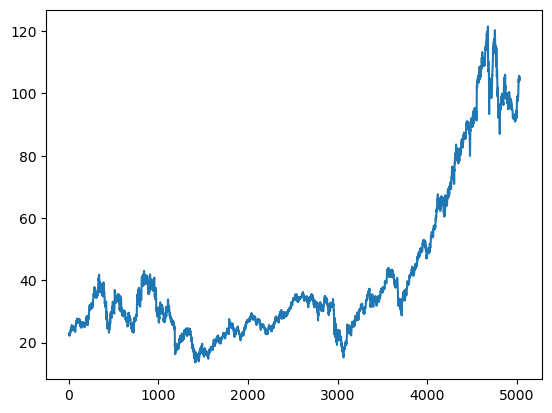

In [5]:
input_file="DIS.csv"
# plot the data
plt.plot(pd.read_csv(input_file, usecols=[1]))
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

# fix random seed for reproducibility
np.random.seed(5)

# load the dataset
df = read_csv(input_file, header=None, index_col=None, delimiter=',')

# take close price column[5]
all_y = df[5].values
dataset=all_y.reshape(-1, 1)

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# split into train and test sets, 50% test data, 50% training data
train_size = int(len(dataset) * 0.5)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# reshape into X=t and Y=t+1, timestep 240
look_back = 240
X_train, y_train = create_dataset(train, look_back)
X_test, y_test = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_train = torch.from_numpy(X_train).type(torch.Tensor)
y_train = torch.from_numpy(y_train).type(torch.Tensor)
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))
X_test = torch.from_numpy(X_test).type(torch.Tensor)
y_test = torch.from_numpy(y_test).type(torch.Tensor)

print('Shape of train_X:', X_train.shape)
print('Shape of train_Y:', y_train.shape)
print('Shape of test_X:', X_test.shape)
print('Shape of test_Y:', y_test.shape)


In [ ]:
# (seq, batch, hidden)
X_train= X_train.permute(2,0,1)
X_test= X_test.permute(2,0,1)
print(X_train.shape)
X_test.shape

### Build a LSTM net - the architecture should include LSTM layers and Linear layers. [2 points]

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

class SimpleLSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers=1, output_dim=1):
        super(SimpleLSTM, self).__init__()
        "YOUR CODE"
    def forward(self, x):
        "YOUR CODE"


### Define your training process and train the models. [2 points]
#### You should use Mean Squared Error as your loss function.
#### Any optimizer of your choice.

In [ ]:
# Assuming X_train and y_train are your training data and labels respectively,
# and they're already converted to PyTorch tensors.

from torch.autograd import Variable
# HyperParameters for the model such as input_dim, hidden_dim, learning_rate, epochs etc
"YOUR CODE"
epochs = "YOUR CODE"
# Intialize the model
model = "YOUR CODE"
# Loss function and optimizer
criterion = "YOUR CODE"
optimizer = "YOUR CODE"

# Convert datasets to PyTorch Variables
X_train_var = Variable(X_train)
y_train_var = Variable(y_train)

model.train()  # Set the model to training mode

for epoch in range(epochs):

    # Clear the gradients
    "YOUR CODE"

    # Forward pass: compute the output
    output = "YOUR CODE"

    # Compute the loss
    loss = "YOUR CODE"

    # Backward pass: compute the gradient
    "YOUR CODE"

    # Update the weights
    "YOUR CODE"

    if (epoch+1) % 10 == 0:  # Print loss every 10 epochs
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')


#### Your can use the following code to make predictions or you can write your own code.

In [ ]:
# Assuming X_test is your test dataset and it's already converted to a PyTorch tensor. 

X_test_var = Variable(X_test)

model.eval()  # Set the model to evaluation mode

with torch.no_grad():  # Inference mode, gradients not needed
    predictions = model(X_test_var).squeeze()  # Forward pass: compute the output
    
# Convert predictions back to a numpy array (if needed)
predictions_np = predictions.numpy()

# Now, `predictions_np` contains your model's predictions
# Plot the real and predicted values
plt.plot(predictions_np, 'r', label='prediction')
plt.plot(y_test, 'b', label='real')
plt.legend(loc='best')

### Build a GRU model and repeat the training process for GRU.  [2 points]


In [ ]:
"YOUR CODE"

### Fine-tune your models and obtain a prediction plot as following: [4 points]
### 
### <span style="color:orange">*You need to save the results and display plots for each round of fine-tuning to show the improvement of your models.* </span>

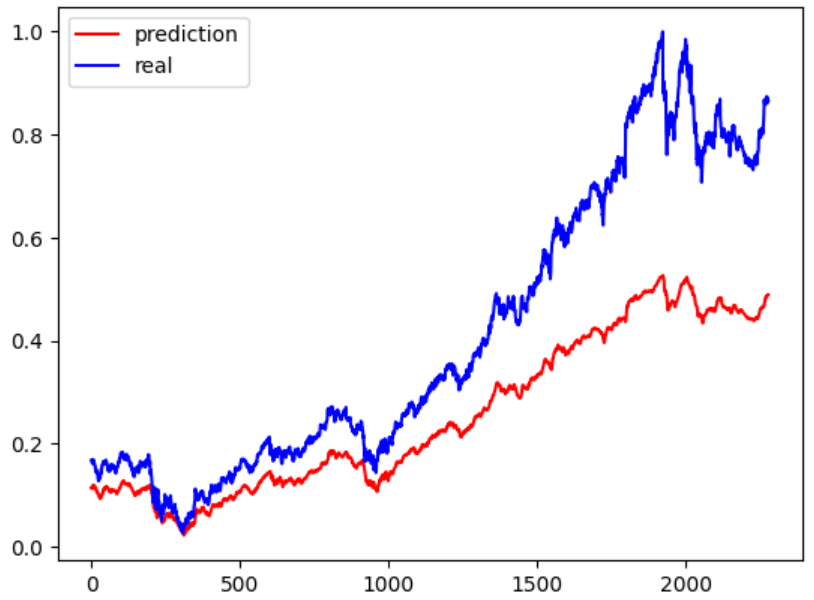